# Exploritary Data Analysis

1. Basics
2. Missing Values
3. Distribution
4. Correlation
5. Outliers

In [70]:
import pandas as pd
train = pd.read_csv('train_house_prices.csv')
test = pd.read_csv('test_house_prices.csv')

## 1. Basics

* Number of rows
* Number of columns

In [71]:
# shape(rows, columns)
print(f'Shape of train data = {train.shape}')
print(f'Shape of test data = {test.shape}')

Shape of train data = (1460, 81)
Shape of test data = (1459, 80)


## 2. Missing Values

* Make a table of the data types, amount of null values (Checking Missing Values) and description of all the features

In [72]:
data_types = train.dtypes
null_values = train.isnull().sum()
feature_names = train.columns
df_dt_null = pd.DataFrame({'Features':feature_names,'Data Types': data_types, 'Null Values': null_values})
df_dt_null = df_dt_null.sort_values(by='Null Values', ascending=False)
df_dt_null_markdown =df_dt_null.copy()
df_dt_null_markdown.drop('Features', inplace=True, axis=1)

In [73]:
print(df_dt_null_markdown.to_markdown())

|               | Data Types   |   Null Values |
|:--------------|:-------------|--------------:|
| PoolQC        | object       |          1453 |
| MiscFeature   | object       |          1406 |
| Alley         | object       |          1369 |
| Fence         | object       |          1179 |
| FireplaceQu   | object       |           690 |
| LotFrontage   | float64      |           259 |
| GarageYrBlt   | float64      |            81 |
| GarageCond    | object       |            81 |
| GarageType    | object       |            81 |
| GarageFinish  | object       |            81 |
| GarageQual    | object       |            81 |
| BsmtFinType2  | object       |            38 |
| BsmtExposure  | object       |            38 |
| BsmtQual      | object       |            37 |
| BsmtCond      | object       |            37 |
| BsmtFinType1  | object       |            37 |
| MasVnrArea    | float64      |             8 |
| MasVnrType    | object       |             8 |
| Electrical    | ob

| Features | DataType | Null Values | Description |
|:--------------|:--------|-----:| :-----------|
| PoolQC        | object  | 1453 |
| MiscFeature   | object  | 1406 |
| Alley         | object  | 1369 |
| Fence         | object  | 1179 |
| FireplaceQu   | object  |  690 |
| LotFrontage   | float64 |  259 |
| GarageYrBlt   | float64 |   81 |
| GarageCond    | object  |   81 |
| GarageType    | object  |   81 |
| GarageFinish  | object  |   81 |
| GarageQual    | object  |   81 |
| BsmtFinType2  | object  |   38 |
| BsmtExposure  | object  |   38 |
| BsmtQual      | object  |   37 |
| BsmtCond      | object  |   37 |
| BsmtFinType1  | object  |   37 |
| MasVnrArea    | float64 |    8 |
| MasVnrType    | object  |    8 |
| Electrical    | object  |    1 |
| Id            | int64   |    0 |
| Functional    | object  |    0 |
| Fireplaces    | int64   |    0 |
| KitchenQual   | object  |    0 |
| KitchenAbvGr  | int64   |    0 |
| BedroomAbvGr  | int64   |    0 |
| HalfBath      | int64   |    0 |
| FullBath      | int64   |    0 |
| BsmtHalfBath  | int64   |    0 |
| TotRmsAbvGrd  | int64   |    0 |
| GarageCars    | int64   |    0 |
| GrLivArea     | int64   |    0 |
| GarageArea    | int64   |    0 |
| PavedDrive    | object  |    0 |
| WoodDeckSF    | int64   |    0 |
| OpenPorchSF   | int64   |    0 |
| EnclosedPorch | int64   |    0 |
| 3SsnPorch     | int64   |    0 |
| ScreenPorch   | int64   |    0 |
| PoolArea      | int64   |    0 |
| MiscVal       | int64   |    0 |
| MoSold        | int64   |    0 |
| YrSold        | int64   |    0 |
| SaleType      | object  |    0 |
| SaleCondition | object  |    0 |
| BsmtFullBath  | int64   |    0 |
| HeatingQC     | object  |    0 |
| LowQualFinSF  | int64   |    0 |
| LandSlope     | object  |    0 |
| OverallQual   | int64   |    0 |
| HouseStyle    | object  |    0 |
| BldgType      | object  |    0 |
| Condition2    | object  |    0 |
| Condition1    | object  |    0 |
| Neighborhood  | object  |    0 |
| LotConfig     | object  |    0 |
| YearBuilt     | int64   |    0 |
| Utilities     | object  |    0 |
| LandContour   | object  |    0 |
| LotShape      | object  |    0 |
| Street        | object  |    0 |
| LotArea       | int64   |    0 |
| MSZoning      | object  |    0 |
| OverallCond   | int64   |    0 |
| YearRemodAdd  | int64   |    0 |
| 2ndFlrSF      | int64   |    0 |
| BsmtFinSF2    | int64   |    0 |
| 1stFlrSF      | int64   |    0 |
| CentralAir    | object  |    0 |
| MSSubClass    | int64   |    0 |
| Heating       | object  |    0 |
| TotalBsmtSF   | int64   |    0 |
| BsmtUnfSF     | int64   |    0 |
| BsmtFinSF1    | int64   |    0 |
| RoofStyle     | object  |    0 |
| Foundation    | object  |    0 |
| ExterCond     | object  |    0 |
| ExterQual     | object  |    0 |
| Exterior2nd   | object  |    0 |
| Exterior1st   | object  |    0 |
| RoofMatl      | object  |    0 |
| SalePrice     | int64   |    0 |


* Visualize Missing Values

In [74]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(df_dt_null, x= 'Features', y= 'Null Values', color= 'Null Values', color_continuous_scale=px.colors.sequential.Plasma_r,height=400,)
fig.show()

* Heatmap of Missing Values

In [75]:
null_counts = train.isnull()
fig_heatmap = px.imshow(null_counts, x=train.columns, y=train.index, color_continuous_scale=px.colors.sequential.Reds)
fig_heatmap.show()

# 2. Distribution

Distributions are being used to check the distribution of the data. 
Different Distributions:
* Discrete distribution: binomial or Poisson
* Coninuous distribution: Normal or unifrom
* Multivariate distribution: Multivariate normal or Multinomial
* Univariate distribution: Normal or exponential
* Exponential family distributions
* heavy-tailed distributions: Student's t-distribution, Cauchy or Pareto
* Skewed distribution: Lognormal or exponential


This is important to check if the data is distributed for the right machine learning algorithms:
* Normal Distribution: Linear regression, logistic regression, linear discriminant analysis (LDA), Gaussian naive Bayes
* Any distribution: Decision Tree, Random Forest, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, Neural Network


We will use Skewness, Kurtosis and Shapiro-Wilk test for normality.

* Skewness assesses the extent to which a variable’s distribution is symmetrical. The thumb rule is,

    *  If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
    *  If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
    * If the skewness is less than -1 or greater than 1, the data are highly skewed.
* Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve. The thumb rule is,

    * Kurtosis greater than +1 indicates distribution is too peaked.
    * Kurtosis less than –1 indicates a distribution that is too flat.

### 2.2 Normal Distribution of Target Variable

* Normal Distribution and Probability plot of SalePrice

Kurtosis of SalePrice = 6.536281860064529
Skewness of SalePrice = 1.880940746034036


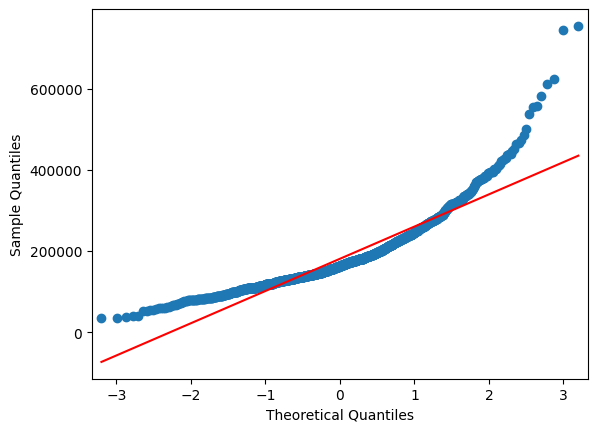

In [76]:
from scipy.stats import skew
import numpy as np
skewness = skew(train['SalePrice'])
kurtosis = train['SalePrice'].kurt()
print(f'Kurtosis of SalePrice = {kurtosis}')
print(f'Skewness of SalePrice = {skewness}')
train['SalePrice'].describe()
fig_1 = px.histogram(train, x="SalePrice",histnorm="probability density")
fig_1.show()
# using statsmodels
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(train['SalePrice'], line='s').gca().lines

So we have to transform the target variable to make it more normally distributed in Data Preprocessing.